#                             # IMS Term-2 Project 

# Sentiment Analysis for Electronic goods using Twitter data from  Amazon, Flipkart and Snapdeal websites


* The goal of this project is to do sentiment analysis using twitter data of customer from India for three companies Amazon , Flipkart and Snapdeal.

* In this project we will extract the tweets from Twitter for these companies,we will make word cloud and perform positive and negative sentiment analysis.

* This study would be helpful for the new company who want to start their operations in India as they will get specific insights from this study.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tweepy as tw
import time
from datetime import datetime, timedelta
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.stem import PorterStemmer
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from PIL import Image


[nltk_data] Downloading package stopwords to /Users/dan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Twitter Developer Login

consumer_key = "k9bNeS6dLOQDZDz5UVKKMTKRE"
consumer_secret = "2otrjcqFJrxBAHe98cdVUJs6IhGvaQ5AUPDHf5ANaTBRB7gVQF"
access_key = "711793825774235648-Y9DltrhTJriyWxGDAIU8X1BLF4mdLcx"
access_secret = "uPxRbRxNL7Ov2dShh9jDWnCSg2CdiNy3NXEhvO2Xy8Uti"

In [3]:
auth = tw.OAuthHandler(consumer_key, consumer_secret) # authenticate 
auth.set_access_token(access_key, access_secret) # auth
api = tw.API(auth, wait_on_rate_limit=True) # connection

### Amazon SamsungTv Tweets extraction

In [4]:
new_search="%amazonIN -filter:retweets" + "Samsung TV -filter:retweets"
tweets = tw.Cursor(api.search,
                       q=new_search,tweet_mode = 'extended',
                       lang="en").items(30)

# Collect a list of tweets
df = [[tweet.user.screen_name, tweet.user.location ,tweet.source, tweet.full_text] for tweet in tweets]
amazon_tweets = pd.DataFrame(data=df,columns = ['User','Location','Source','Tweets'])
amazon_tweets.head()

      


,User,Location,Source,Tweets
0,ishashah2501,"Gujarat, India",Twitter for Android,@amazon @AmazonHelp @amazonIN @JeffBezos @Amit...
1,lifeEstyleindia,jodhpur,Twitter Web App,The Attic Sheesham Easy View Corner Tv Unit (B...
2,AmazonIn_Offers,,Twitter Web App,Check out Mi TV 4X 125.7 cm (50 Inches) 4K Ult...
3,AmazonIn_Offers,,Twitter Web App,Check out TCL 138.78 cm (55 inches) AI 4K UHD...
4,AmazonIn_Offers,,Twitter Web App,Check out OnePlus Y Series 80 cm (32 inches) H...


In [5]:
amazon_tweets.to_csv("AmazonSamsungTV.csv",index=False)

In [6]:
AmazonSamsungTV = pd.read_csv("AmazonSamsungTV.csv")
AmazonSamsungTV["product"] = "SamsungTv"
AmazonSamsungTV.to_csv("AmazonSamsungTV.csv", index=False)

### LG Amazon Tweets extraction

In [7]:
new_search = "%amazonIN -filter:retweets" + "lgtv -filter:retweets"
tweets = tw.Cursor(api.search,
                       q=new_search,
                       lang="en").items(30)

# Collect a list of tweets
df = [[tweet.user.screen_name,tweet.user.location,tweet.source,tweet.text] for tweet in tweets]
amazon_tweets = pd.DataFrame(data=df,columns = ['User','Location','Source','Tweets'])
amazon_tweets.shape

(30, 4)

In [8]:
amazon_tweets.iloc[2,3]

'@MNS9_Live \nFlipkart without any notice account block\n26 k gift amount no use and Samsung F41  defeactive mobile no… https://t.co/uyhm65vm7V'

In [9]:
amazon_tweets.head()

,User,Location,Source,Tweets
0,TBGROUP15,,Twitter Web App,Nillkin Case for Samsung Galaxy S20 S 20 Ultra...
1,apurva_mistry,"Gujarat, India",Twitter for Android,@amazonIN have you ever considered providing a...
2,mhatre_1985,"Maharashtra, India",Twitter for Android,@MNS9_Live \nFlipkart without any notice accou...
3,valmiki903,"Kurnool, India",Twitter Web App,@amazonIN\n @AmazonHelp \n@cybercrimesind \n M...
4,TechnicalSkyin,भारत,Twitter for Android,#realmeBudsWirelessPro featuring ANC up to 35d...


In [10]:
amazon_tweets.to_csv("AmazonLgTV.csv",index=False)
#saving file

In [11]:
AmazonLgTV = pd.read_csv('AmazonLgTV.csv')
AmazonLgTV['product'] = 'LG TV'
AmazonLgTV.head()

,User,Location,Source,Tweets,product
0,TBGROUP15,NaN,Twitter Web App,Nillkin Case for Samsung Galaxy S20 S 20 Ultra...,LG TV
1,apurva_mistry,"Gujarat, India",Twitter for Android,@amazonIN have you ever considered providing a...,LG TV
2,mhatre_1985,"Maharashtra, India",Twitter for Android,@MNS9_Live \nFlipkart without any notice accou...,LG TV
3,valmiki903,"Kurnool, India",Twitter Web App,@amazonIN\n @AmazonHelp \n@cybercrimesind \n M...,LG TV
4,TechnicalSkyin,भारत,Twitter for Android,#realmeBudsWirelessPro featuring ANC up to 35d...,LG TV


In [12]:
AmazonLgTV.to_csv('AmazonLgTV.csv',index = False)
#saving updated file

In [13]:
#saving final file 
AmazonFinal = pd.concat([AmazonSamsungTV,AmazonLgTV])
AmazonFinal.to_csv('AmazonFinal.csv',index = False)

In [14]:
Amazon = pd.read_csv('AmazonFinal.csv')
Amazon.head()

,User,Location,Source,Tweets,product
0,ishashah2501,"Gujarat, India",Twitter for Android,@amazon @AmazonHelp @amazonIN @JeffBezos @Amit...,SamsungTv
1,lifeEstyleindia,jodhpur,Twitter Web App,The Attic Sheesham Easy View Corner Tv Unit (B...,SamsungTv
2,AmazonIn_Offers,NaN,Twitter Web App,Check out Mi TV 4X 125.7 cm (50 Inches) 4K Ult...,SamsungTv
3,AmazonIn_Offers,NaN,Twitter Web App,Check out TCL 138.78 cm (55 inches) AI 4K UHD...,SamsungTv
4,AmazonIn_Offers,NaN,Twitter Web App,Check out OnePlus Y Series 80 cm (32 inches) H...,SamsungTv


### Data Preparation

In [15]:
# cleaning the data
# Converting the string to lower case in tweets column only 
Amazon.Tweets = Amazon.Tweets.str.lower() 
Amazon.head()

,User,Location,Source,Tweets,product
0,ishashah2501,"Gujarat, India",Twitter for Android,@amazon @amazonhelp @amazonin @jeffbezos @amit...,SamsungTv
1,lifeEstyleindia,jodhpur,Twitter Web App,the attic sheesham easy view corner tv unit (b...,SamsungTv
2,AmazonIn_Offers,NaN,Twitter Web App,check out mi tv 4x 125.7 cm (50 inches) 4k ult...,SamsungTv
3,AmazonIn_Offers,NaN,Twitter Web App,check out tcl 138.78 cm (55 inches) ai 4k uhd...,SamsungTv
4,AmazonIn_Offers,NaN,Twitter Web App,check out oneplus y series 80 cm (32 inches) h...,SamsungTv


In [16]:
Amazon.iloc[:,3].head()

0    @amazon @amazonhelp @amazonin @jeffbezos @amit...
1    the attic sheesham easy view corner tv unit (b...
2    check out mi tv 4x 125.7 cm (50 inches) 4k ult...
3    check out tcl 138.78 cm (55 inches)  ai 4k uhd...
4    check out oneplus y series 80 cm (32 inches) h...
Name: Tweets, dtype: object

In [17]:
# removing URL from  anywhere in the data
Amazon['Tweets'] = Amazon['Tweets'].str.replace(r'http\S+|www.\S+','',case=False)
Amazon.iloc[:,3].head()

0    @amazon @amazonhelp @amazonin @jeffbezos @amit...
1    the attic sheesham easy view corner tv unit (b...
2    check out mi tv 4x 125.7 cm (50 inches) 4k ult...
3    check out tcl 138.78 cm (55 inches)  ai 4k uhd...
4    check out oneplus y series 80 cm (32 inches) h...
Name: Tweets, dtype: object

In [18]:
import string
string.punctuation
def remove_punctuation(text):
    text_nopunt="".join([c for c in text if c not in string.punctuation])
    return text_nopunt
Amazon['Tweets']=Amazon['Tweets'].apply(lambda x : remove_punctuation(x))
Amazon['Tweets'].tail()

55    i played this interesting quiz on amazon i pla...
56    bhaleraosarang amazonin mumbaipolice kolkatapo...
57    i played this interesting quiz on amazonplay g...
58    i played this interesting quiz on amazon i pla...
59    techwithbiswa cyberdost amazonin razorpay plea...
Name: Tweets, dtype: object

In [19]:
#to remove no..
Amazon['Tweets'] = Amazon['Tweets'].str.replace('\d+', '')  #  /d+ is to find numbers from anywhere
Amazon.Tweets.tail()

55    i played this interesting quiz on amazon i pla...
56    bhaleraosarang amazonin mumbaipolice kolkatapo...
57    i played this interesting quiz on amazonplay g...
58    i played this interesting quiz on amazon i pla...
59    techwithbiswa cyberdost amazonin razorpay plea...
Name: Tweets, dtype: object

In [20]:
#removing stopwords
stop = stopwords.words('english')
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
Amazon['Tweets'] = Amazon['Tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
Amazon.Tweets.tail()

55    played interesting quiz amazon played interest...
56    bhaleraosarang amazonin mumbaipolice kolkatapo...
57    played interesting quiz amazonplay games amazo...
58    played interesting quiz amazon played interest...
59    techwithbiswa cyberdost amazonin razorpay plea...
Name: Tweets, dtype: object

In [21]:
Amazon.Tweets

0     amazon amazonhelp amazonin jeffbezos amitagarw...
1     attic sheesham easy view corner tv unit brown ...
2     check mi tv x cm inches k ultra hd android led...
3     check tcl cm inches ai k uhd certified android...
4     check oneplus series cm inches hd ready led sm...
5     amazonin vutv inch k ultra back stock go alter...
6     amazonhelp hi team service scheduled cancelled...
7     amazonin amazonindia smarttvs bestof inches be...
8     check allnew fire tv stick alexa voice remote ...
9     ipuneetarora panasonic panasonicindia mine iss...
10    amazonin oneplussupport purchased oneplus q pr...
11    kodak kodaktvindia amazon amazonin consumerfor...
12    amazonhelp amazonin today purchased stablizer ...
13    amazonin firetvstick k play netflix movies k k tv
14    amazonin u give quotation fr items email amitb...
15    amazonin amitagarwal hw cn u renege ur word or...
16    amazonin today received call saying iphone tv ...
17    hey amazonin bought oneplusin q pro tv th 

In [22]:
#remove emojis
import re

RE_EMOJI = re.compile('([\U00010000-\U0010ffff])|([\U00002600-\U000027BF])|([\U0001f300-\U0001f64F])|([\U0001f680-\U0001f6FF])', flags=re.UNICODE)

def strip_emoji(text):
    return RE_EMOJI.sub(r'', text)


Amazon['Tweets'] = Amazon['Tweets'].apply(lambda x :strip_emoji(x))
Amazon.Tweets.tail()

55    played interesting quiz amazon played interest...
56    bhaleraosarang amazonin mumbaipolice kolkatapo...
57    played interesting quiz amazonplay games amazo...
58    played interesting quiz amazon played interest...
59    techwithbiswa cyberdost amazonin razorpay plea...
Name: Tweets, dtype: object

In [23]:
words = set(nltk.corpus.words.words())
words
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text =  re.sub('lockdowneffect|lockdown', '', text)  # sub is used to replace
    text =  re.sub(r"\b[a-zA-Z]\b", "", text)  # search for single letter than replace # b is for aplhabet
    text =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", text) # search for combination of small or capital than replace
    text =  re.sub("[^a-zA-Z]"," ",text)# Search for all non-letters # Replace all non-letters with spaces
    text =  " ".join(w for w in nltk.wordpunct_tokenize(text) if w.lower() in words or not w.isalpha())
    text =  re.sub(r' +', ' ',text)
    return text

round2 = lambda x: clean_text_round2(x)
# sub is used for replacement

# Let's take a look at the updated text
Amazon['Tweets'] = pd.DataFrame(Amazon.Tweets.apply(round2))

Amazon.Tweets.tail()

55           interesting quiz interesting quiz
56    yes got call one fraud number cannot fin
57                            interesting quiz
58           interesting quiz interesting quiz
59                         please refund money
Name: Tweets, dtype: object

In [24]:
from nltk.stem import PorterStemmer

# the most commonly used stemmer
ps = PorterStemmer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

Amazon['Tweets'].head()

0    poor service regarding installation lied insta...
1    attic easy view corner unit brown attic via go...
2                    check ultra android led black via
3    check certified android smart led black model via
4    check series ready led smart android black mod...
Name: Tweets, dtype: object

In [25]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
Amazon_cv = cv.fit_transform(Amazon.Tweets) # matrix
Amazon_dtm = pd.DataFrame(Amazon_cv.toarray(), columns=cv.get_feature_names()) # dataframe

# One of the required inputs is a term-document matrix
tdm = Amazon_dtm.transpose()
tdm.head() 

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
accept,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
account,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
action,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ago,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
alternate,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
tdm['freq'] = tdm.sum(axis=1)
tdm.reset_index(inplace=True)
tdm.head()

,index,0,1,2,3,4,5,6,7,8,...,51,52,53,54,55,56,57,58,59,freq
0,accept,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,account,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,action,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,ago,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,alternate,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
tdm1=tdm[["index","freq"]]
tdm1.rename(columns = {'index':'Word'}, inplace = True)
tdm1.sort_values(by='freq',ascending=False,inplace=True)
tdm1.head(20)

/Users/dan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-27-0d6b946742ec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdm1.sort_values(by='freq',ascending=False,inplace=True)


,Word,freq
150,quiz,10
93,interesting,9
92,installation,7
209,today,6
159,refund,6
16,black,6
119,money,5
216,ultra,5
164,replace,5
169,review,5


In [28]:
Tweets = " ".join(review for review in Amazon.Tweets)
print ("There are {} words in the combination of all review.".format(len(Tweets)))

There are 3074 words in the combination of all review.


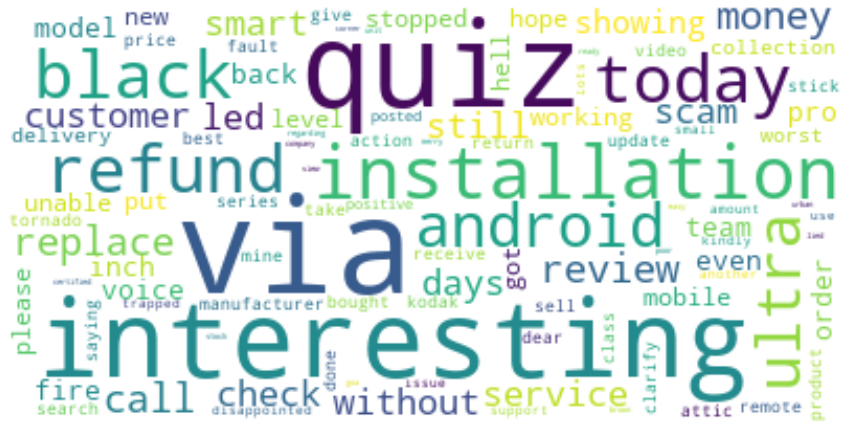

In [29]:
#wordcloud

import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

wordcloud = WordCloud(background_color="white",max_words=100,collocations=False).generate(Tweets)
plt.figure(figsize=[15,27])
plt.imshow(wordcloud, interpolation="bilinear") # collacocations false means we dont want to repeat the words
plt.axis("off")
plt.show()

### Performing overall amazon sentiment analysis

In [30]:
from textblob import TextBlob
pol = lambda x: TextBlob(x).sentiment.polarity
Amazon['polarity'] = Amazon['Tweets'].apply(pol)
Amazon.head(5)

,User,Location,Source,Tweets,product,polarity
0,ishashah2501,"Gujarat, India",Twitter for Android,poor service regarding installation lied insta...,SamsungTv,-0.200000
1,lifeEstyleindia,jodhpur,Twitter Web App,attic easy view corner unit brown attic via go...,SamsungTv,0.433333
2,AmazonIn_Offers,NaN,Twitter Web App,check ultra android led black via,SamsungTv,-0.166667
3,AmazonIn_Offers,NaN,Twitter Web App,check certified android smart led black model via,SamsungTv,0.023810
4,AmazonIn_Offers,NaN,Twitter Web App,check series ready led smart android black mod...,SamsungTv,0.082540


In [31]:
#Polarity check for data
Amazon['sentiment'] = np.where(Amazon['polarity']>=0,'Positive','Negative')
Amazon.head()

,User,Location,Source,Tweets,product,polarity,sentiment
0,ishashah2501,"Gujarat, India",Twitter for Android,poor service regarding installation lied insta...,SamsungTv,-0.200000,Negative
1,lifeEstyleindia,jodhpur,Twitter Web App,attic easy view corner unit brown attic via go...,SamsungTv,0.433333,Positive
2,AmazonIn_Offers,NaN,Twitter Web App,check ultra android led black via,SamsungTv,-0.166667,Negative
3,AmazonIn_Offers,NaN,Twitter Web App,check certified android smart led black model via,SamsungTv,0.023810,Positive
4,AmazonIn_Offers,NaN,Twitter Web App,check series ready led smart android black mod...,SamsungTv,0.082540,Positive


In [32]:
Amazon.sentiment.value_counts()

Positive    45
Negative    15
Name: sentiment, dtype: int64

In [33]:
Amazon.sentiment.value_counts(normalize = True)
#to normalize the values

Positive    0.75
Negative    0.25
Name: sentiment, dtype: float64

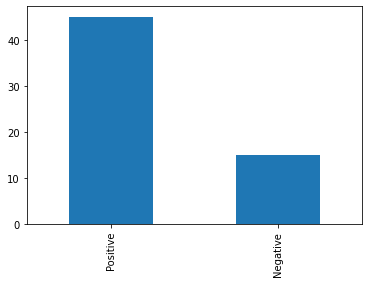

In [34]:
Amazon.sentiment.value_counts().plot.bar()

### Product wise sentiment analysis count

In [35]:
counts = Amazon["product"].value_counts()
counts

SamsungTv    30
LG TV        30
Name: product, dtype: int64

In [36]:
result = pd.crosstab(index=Amazon['product'],columns = Amazon['sentiment'],margins = True)
result

sentiment,Negative,Positive,All
product,,,
LG TV,2,28,30
SamsungTv,13,17,30
All,15,45,60


In [37]:
Result_Perc = pd.crosstab(index=Amazon['product'], columns=Amazon['sentiment'], margins= True,normalize = True)
Result_Perc*100
#in prcentage form

sentiment,Negative,Positive,All
product,,,
LG TV,3.333333,46.666667,50.0
SamsungTv,21.666667,28.333333,50.0
All,25.000000,75.000000,100.0


### Extracting tweets for different electronic goods from flipkartIndia and saving those tweets in csv file

### Flipkart and Samsung Tv tweets

In [38]:
new_search="%Flipkart -filter:retweets" + "SamsungTv -filter:retweets"
tweets = tw.Cursor(api.search,
                       q=new_search,tweet_mode = 'extended',
                       lang="en").items(30)

# Collect a list of tweets
df = [[tweet.user.screen_name, tweet.user.location ,tweet.source, tweet.full_text] for tweet in tweets]
flipkart_tweets = pd.DataFrame(data=df,columns = ['User','Location','Source','Tweets'])
flipkart_tweets.head()

,User,Location,Source,Tweets
0,harshitechtv,"Pune, India",Twitter for Android,@flipkartsupport @Flipkart I give you 3 days (...
1,mhatre_1985,"Maharashtra, India",Twitter for Android,@MNS9_Live \nFlipkart without any notice accou...
2,Pankaj94140674,"Swindon, England",Microsoft Azure Logic Apps,#Flipkart #flipkart420 #flipkartfraud 493478\n...
3,KidwaiHisan,,Twitter for Android,@NIKHIL___R @ishanagarwal24 It's available for...
4,Pankaj94140674,"Swindon, England",Microsoft Azure Logic Apps,#Flipkart #flipkart420 #flipkartfraud 407109\n...


In [39]:
flipkart_tweets.to_csv("FlipkartSamsungTV.csv",index=False)
#saving file

In [40]:
FlipkartSamsungTV = pd.read_csv("FlipkartSamsungTV.csv")
FlipkartSamsungTV["product"] = "SamsungTV"
FlipkartSamsungTV.to_csv("FlipkartSamsungTV.csv", index=False)
# saving the updated file

### Flipkart MITV tweets

In [41]:
new_search="%flipkart -filter:retweets" + " MI Tv -filter:retweets"
tweets = tw.Cursor(api.search,
                       q=new_search,tweet_mode = 'extended',
                       lang="en").items(30)

# Collect a list of tweets
df = [[tweet.user.screen_name, tweet.user.location ,tweet.source, tweet.full_text] for tweet in tweets]
flipkart_tweets = pd.DataFrame(data=df,columns = ['User','Location','Source','Tweets'])
flipkart_tweets.head()

,User,Location,Source,Tweets
0,Amazingdeals360,India,Twitter for Android,BEST OFFERS ON BEST TV\n(50 inch) Ultra HD (4K...
1,srikanth_ravela,"Hyderabad, India",Twitter for iPhone,"@Flipkart Hi team,\nExpecting MI Q1 with 3year..."
2,srikanth_ravela,"Hyderabad, India",Twitter for iPhone,"@MiTVIndia @Flipkart Hi flipkart team,\nExpect..."
3,Teja_ka_bheja,"Noida, India",Twitter for Android,@Flipkart order ID OD220538790854077000 ( MI T...
4,mebharatt,Hyderabad,Twitter for Android,@SrinivasBellam @ActivistTeja @Techglares @sha...


In [42]:
flipkart_tweets.to_csv("FlipkartMITV.csv",index=False)

In [43]:
FlipkartMITV = pd.read_csv("FlipkartMITV.csv")
FlipkartMITV["product"] = "MI Tv"
FlipkartMITV.to_csv("FlipkartMITV.csv", index=False)

In [44]:
#Saving and Concatenating the both files into final data file 
FlipkartFinal = pd.concat([FlipkartSamsungTV,FlipkartMITV])
FlipkartFinal.to_csv('FlipkartFinal.csv',index = False)

In [45]:
Flipkart = pd.read_csv('FlipkartFinal.csv')
Flipkart.head()

,User,Location,Source,Tweets,product
0,harshitechtv,"Pune, India",Twitter for Android,@flipkartsupport @Flipkart I give you 3 days (...,SamsungTV
1,mhatre_1985,"Maharashtra, India",Twitter for Android,@MNS9_Live \nFlipkart without any notice accou...,SamsungTV
2,Pankaj94140674,"Swindon, England",Microsoft Azure Logic Apps,#Flipkart #flipkart420 #flipkartfraud 493478\n...,SamsungTV
3,KidwaiHisan,NaN,Twitter for Android,@NIKHIL___R @ishanagarwal24 It's available for...,SamsungTV
4,Pankaj94140674,"Swindon, England",Microsoft Azure Logic Apps,#Flipkart #flipkart420 #flipkartfraud 407109\n...,SamsungTV


In [46]:
Flipkart.tail()

,User,Location,Source,Tweets,product
55,FlashSaleTricks,Chennai,Twitter for Android,"Mi QLED 4K TV (55"") for Rs 54,999 now availabl...",MI Tv
56,Amazingdeals360,India,Twitter for Android,Mi Q1 138.8 cm (55) Ultra HD (4K) QLED Smart A...,MI Tv
57,Nisar_1987,Bangalore,Twitter for Android,First sale of Mi QLED TV 4K is live now on htt...,MI Tv
58,XiaomiIndia,India,Twitter Web App,The #MiQLEDTV4K comes with\n\n4K QLED TV panel...,MI Tv
59,FlashSaleTricks,Chennai,Twitter for Android,"Mi QLED 4K TV (55"") for Rs 54,999 | Sale start...",MI Tv


In [47]:
Flipkart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User      60 non-null     object
 1   Location  38 non-null     object
 2   Source    58 non-null     object
 3   Tweets    60 non-null     object
 4   product   60 non-null     object
dtypes: object(5)
memory usage: 2.5+ KB


In [48]:
# cleaning the data
# Converting the tweets into LowerCase
Flipkart.Tweets = Flipkart.Tweets.str.lower()
Flipkart.head()

,User,Location,Source,Tweets,product
0,harshitechtv,"Pune, India",Twitter for Android,@flipkartsupport @flipkart i give you 3 days (...,SamsungTV
1,mhatre_1985,"Maharashtra, India",Twitter for Android,@mns9_live \nflipkart without any notice accou...,SamsungTV
2,Pankaj94140674,"Swindon, England",Microsoft Azure Logic Apps,#flipkart #flipkart420 #flipkartfraud 493478\n...,SamsungTV
3,KidwaiHisan,NaN,Twitter for Android,@nikhil___r @ishanagarwal24 it's available for...,SamsungTV
4,Pankaj94140674,"Swindon, England",Microsoft Azure Logic Apps,#flipkart #flipkart420 #flipkartfraud 407109\n...,SamsungTV


In [49]:
# removing URL from  anywhere in the data
Flipkart['Tweets'] = Flipkart['Tweets'].str.replace(r'http\S+|www.\S+','',case=False)
Flipkart.iloc[1,3]

'@mns9_live \nflipkart without any notice account block\n26 k gift amount no use and samsung f41  defeactive mobile not return no any flipkart excucative response.flipkart no any help directly acccount block.withoutbnotice\nplease help me @flipkartsupport @samsungindia @amazonin'

In [50]:
#removing punctuation
import string
string.punctuation
def remove_punctuation(text):
    text_nopunt="".join([c for c in text if c not in string.punctuation])
    return text_nopunt
Flipkart['Tweets']=Flipkart['Tweets'].apply(lambda x : remove_punctuation(x))
Flipkart.head()

,User,Location,Source,Tweets,product
0,harshitechtv,"Pune, India",Twitter for Android,flipkartsupport flipkart i give you 3 days 72h...,SamsungTV
1,mhatre_1985,"Maharashtra, India",Twitter for Android,mns9live \nflipkart without any notice account...,SamsungTV
2,Pankaj94140674,"Swindon, England",Microsoft Azure Logic Apps,flipkart flipkart420 flipkartfraud 493478\n fl...,SamsungTV
3,KidwaiHisan,NaN,Twitter for Android,nikhilr ishanagarwal24 its available for 50k o...,SamsungTV
4,Pankaj94140674,"Swindon, England",Microsoft Azure Logic Apps,flipkart flipkart420 flipkartfraud 407109\n fl...,SamsungTV


In [51]:
Flipkart.iloc[1,3]

'mns9live \nflipkart without any notice account block\n26 k gift amount no use and samsung f41  defeactive mobile not return no any flipkart excucative responseflipkart no any help directly acccount blockwithoutbnotice\nplease help me flipkartsupport samsungindia amazonin'

In [52]:
#remove nos.
Flipkart['Tweets'] = Flipkart['Tweets'].str.replace('\d+', '')  #  /d+ is to find numbers from anywhere
Flipkart.head()

,User,Location,Source,Tweets,product
0,harshitechtv,"Pune, India",Twitter for Android,flipkartsupport flipkart i give you days hrs ...,SamsungTV
1,mhatre_1985,"Maharashtra, India",Twitter for Android,mnslive \nflipkart without any notice account ...,SamsungTV
2,Pankaj94140674,"Swindon, England",Microsoft Azure Logic Apps,flipkart flipkart flipkartfraud \n flipkart \n...,SamsungTV
3,KidwaiHisan,NaN,Twitter for Android,nikhilr ishanagarwal its available for k on fl...,SamsungTV
4,Pankaj94140674,"Swindon, England",Microsoft Azure Logic Apps,flipkart flipkart flipkartfraud \n flipkart \n...,SamsungTV


In [53]:
Flipkart.iloc[1,3]
#as u can see no.s are removed

'mnslive \nflipkart without any notice account block\n k gift amount no use and samsung f  defeactive mobile not return no any flipkart excucative responseflipkart no any help directly acccount blockwithoutbnotice\nplease help me flipkartsupport samsungindia amazonin'

In [54]:
# Removing Stop words

from nltk.corpus import stopwords
stop = stopwords.words('english')
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
Flipkart['Tweets'] = Flipkart['Tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
Flipkart.head()

,User,Location,Source,Tweets,product
0,harshitechtv,"Pune, India",Twitter for Android,flipkartsupport flipkart give days hrs flipkar...,SamsungTV
1,mhatre_1985,"Maharashtra, India",Twitter for Android,mnslive flipkart without notice account block ...,SamsungTV
2,Pankaj94140674,"Swindon, England",Microsoft Azure Logic Apps,flipkart flipkart flipkartfraud flipkart flipk...,SamsungTV
3,KidwaiHisan,NaN,Twitter for Android,nikhilr ishanagarwal available k flipkart exch...,SamsungTV
4,Pankaj94140674,"Swindon, England",Microsoft Azure Logic Apps,flipkart flipkart flipkartfraud flipkart flipk...,SamsungTV


In [55]:
words = set(nltk.corpus.words.words())
words
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text =  re.sub('lockdowneffect|lockdown', '', text)  # sub is used to replace
    text =  re.sub(r"\b[a-zA-Z]\b", "", text)  # search for single letter than replace # b is for aplhabet
    text =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", text) # search for combination of small or capital than replace
    text =  re.sub("[^a-zA-Z]"," ",text)# Search for all non-letters # Replace all non-letters with spaces
    text =  " ".join(w for w in nltk.wordpunct_tokenize(text) if w.lower() in words or not w.isalpha())
    text =  re.sub(r' +', ' ',text)
    return text

round2 = lambda x: clean_text_round2(x)
# sub is used for replacement

# Let's take a look at the updated text
Flipkart['Tweets'] = pd.DataFrame(Flipkart.Tweets.apply(round2))

Flipkart['Tweets'].tail()

55                                            available
56                           ultra smart android credit
57                                      first sale live
58    comes panel vivid picture engine vision superi...
59                                            sale noon
Name: Tweets, dtype: object

In [56]:
from nltk.stem import PorterStemmer

# the most commonly used stemmer
ps = PorterStemmer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

Flipkart['Tweets'].head()

0                                            give days
1    without notice account block gift amount use m...
2                             give refund already days
3                                  available old phone
4                             give refund already days
Name: Tweets, dtype: object

## Building term-document matrix

In [57]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
Flipkart_cv = cv.fit_transform(Flipkart.Tweets) # matrix
Flipkart_dtm = pd.DataFrame(Flipkart_cv.toarray(), columns=cv.get_feature_names()) # dataframe

# One of the required inputs is a term-document matrix
tdm = Flipkart_dtm.transpose()
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
account,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
action,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
active,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
address,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
tdm['freq'] = tdm.sum(axis=1)
tdm.reset_index(inplace=True)
tdm.head()

,index,0,1,2,3,4,5,6,7,8,...,51,52,53,54,55,56,57,58,59,freq
0,able,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,account,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,action,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,active,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,address,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [59]:
tdm1=tdm[["index","freq"]]
tdm1.rename(columns = {'index':'Word'}, inplace = True)
tdm1.sort_values(by='freq',ascending=False,inplace=True)
tdm1.head(10)

/Users/dan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-59-9cfb94d51400>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdm1.sort_values(by='freq',ascending=False,inplace=True)


,Word,freq
60,fake,34
126,refund,12
44,days,11
136,sale,8
121,quiz,7
115,pro,6
7,air,6
146,smart,5
73,home,5
84,led,5


In [60]:
text = " ".join(review for review in Flipkart.Tweets)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 2671 words in the combination of all review.


### Making word cloud

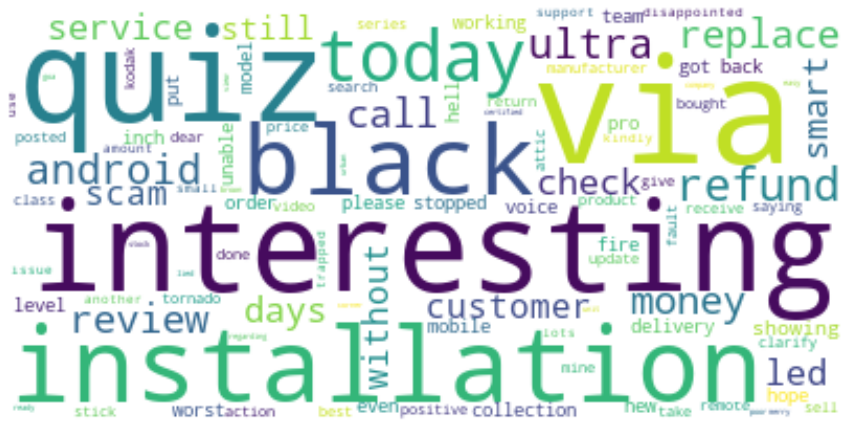

In [61]:
#wordcloud

wordcloud = WordCloud(background_color="white",max_words=100,collocations=False).generate(Tweets)
plt.figure(figsize=[15,27])
plt.imshow(wordcloud, interpolation="bilinear") # collacocations false means we dont want to repeat the words
plt.axis("off")
plt.show()

### Performing overall Flipkart sentiment analysis

In [62]:
from textblob import TextBlob
pol = lambda x: TextBlob(x).sentiment.polarity
Flipkart['polarity'] = Flipkart['Tweets'].apply(pol)
Flipkart.head(5)

,User,Location,Source,Tweets,product,polarity
0,harshitechtv,"Pune, India",Twitter for Android,give days,SamsungTV,0.00
1,mhatre_1985,"Maharashtra, India",Twitter for Android,without notice account block gift amount use m...,SamsungTV,0.10
2,Pankaj94140674,"Swindon, England",Microsoft Azure Logic Apps,give refund already days,SamsungTV,0.00
3,KidwaiHisan,NaN,Twitter for Android,available old phone,SamsungTV,0.25
4,Pankaj94140674,"Swindon, England",Microsoft Azure Logic Apps,give refund already days,SamsungTV,0.00


In [63]:
import numpy as np
Flipkart['Sentiment'] = np.where(Flipkart['polarity']>=0, 'Positive', 'Negative')
Flipkart.head()

,User,Location,Source,Tweets,product,polarity,Sentiment
0,harshitechtv,"Pune, India",Twitter for Android,give days,SamsungTV,0.00,Positive
1,mhatre_1985,"Maharashtra, India",Twitter for Android,without notice account block gift amount use m...,SamsungTV,0.10,Positive
2,Pankaj94140674,"Swindon, England",Microsoft Azure Logic Apps,give refund already days,SamsungTV,0.00,Positive
3,KidwaiHisan,NaN,Twitter for Android,available old phone,SamsungTV,0.25,Positive
4,Pankaj94140674,"Swindon, England",Microsoft Azure Logic Apps,give refund already days,SamsungTV,0.00,Positive


In [64]:
Flipkart.Sentiment.value_counts()

Positive    49
Negative    11
Name: Sentiment, dtype: int64

In [65]:
Flipkart.Sentiment.value_counts(normalize = True)

Positive    0.816667
Negative    0.183333
Name: Sentiment, dtype: float64

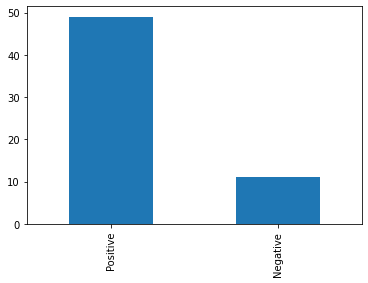

In [66]:
Flipkart.Sentiment.value_counts().plot.bar()

In [67]:
counts = Flipkart["product"].value_counts()
counts

SamsungTV    30
MI Tv        30
Name: product, dtype: int64

In [68]:
Result = pd.crosstab(index=Flipkart['product'], columns=Flipkart['Sentiment'],margins=True)
Result 

Sentiment,Negative,Positive,All
product,,,
MI Tv,2,28,30
SamsungTV,9,21,30
All,11,49,60


In [69]:
Result_Perc = pd.crosstab(index=Flipkart['product'], columns=Flipkart['Sentiment'], margins= True,normalize = True)
Result_Perc*100
#in percentage form

Sentiment,Negative,Positive,All
product,,,
MI Tv,3.333333,46.666667,50.0
SamsungTV,15.000000,35.000000,50.0
All,18.333333,81.666667,100.0


## Extracting tweets for different electronic goods from SnapdealIndia and saving those tweets in csv file

### Snapdeals SamsungTv Tweets

In [70]:

new_search="%snapdeal -filter:retweets" + "SamsungTv -filter:retweets"
tweets = tw.Cursor(api.search,
                       q=new_search,tweet_mode = 'extended',
                       lang="en").items(3000)

# Collect a list of tweets
df = [[tweet.user.screen_name, tweet.user.location ,tweet.source, tweet.full_text] for tweet in tweets]
snapdeal_tweets = pd.DataFrame(data=df,columns = ['User','Location','Source','Tweets'])
snapdeal_tweets.head()

,User,Location,Source,Tweets
0,sukeshcraft,new delhi India,Twitter for Android,🆂🆄🅺🅴🆂🅷🅲🆁🅰️🅵🆃 Multiple Cheque Book Holder [Mehe...
1,SharmaAmbarPd1,,Twitter for Android,@snapdeal Twitter User Celebrity and VIP\n I a...
2,SharmaAmbarPd1,,Twitter for Android,@snapdeal Twitter User Celebrity and VIP\n I a...
3,SharmaAmbarPd1,,Twitter for Android,@snapdeal Twitter User Celebrity and VIP\n I a...
4,SharmaAmbarPd1,,Twitter for Android,@snapdeal Twitter User Celebrity and VIP\n I a...


In [71]:
snapdeal_tweets.to_csv("SnapdealSamsungTV.csv",index=False)

In [72]:
SnapdealSamsungTV = pd.read_csv("SnapdealSamsungTV.csv")
SnapdealSamsungTV["product"] = "Samsung Tv"
SnapdealSamsungTV.to_csv("SnapdealSamsungTV.csv", index=False)

### Snapdeal LG TV tweets

In [73]:
new_search="%snapdeal -filter:retweets" + "lgtv -filter:retweets"
tweets = tw.Cursor(api.search,
                       q=new_search,tweet_mode = 'extended',
                       lang="en").items(3000)

# Collect a list of tweets
df = [[tweet.user.screen_name,  tweet.user.location ,tweet.source, tweet.full_text] for tweet in tweets]
snapdeals_tweets = pd.DataFrame(data=df,columns = ['User','Location','Source','Tweets'])
snapdeals_tweets.head()

,User,Location,Source,Tweets
0,sukeshcraft,new delhi India,Twitter for Android,🆂🆄🅺🅴🆂🅷🅲🆁🅰️🅵🆃 Multiple Cheque Book Holder [Mehe...
1,SharmaAmbarPd1,,Twitter for Android,@snapdeal Twitter User Celebrity and VIP\n I a...
2,SharmaAmbarPd1,,Twitter for Android,@snapdeal Twitter User Celebrity and VIP\n I a...
3,SharmaAmbarPd1,,Twitter for Android,@snapdeal Twitter User Celebrity and VIP\n I a...
4,SharmaAmbarPd1,,Twitter for Android,@snapdeal Twitter User Celebrity and VIP\n I a...


In [74]:
snapdeal_tweets.to_csv("SnapdealLGTV.csv",index=False)

In [75]:
Snapdeallgtv = pd.read_csv('SnapdealLGTV.csv')
Snapdeallgtv['product'] = 'LG Tv'
Snapdeallgtv.to_csv('SnapdealLGTV.csv',index = False)

In [76]:
# Saving and Merging all snapdeal files into final dataset
SnapdealFinal = pd.concat([SnapdealSamsungTV,Snapdeallgtv])
SnapdealFinal.to_csv('SnapdealFinal.csv',index = False)

In [77]:
Snapdeal = pd.read_csv('SnapdealFinal.csv')
Snapdeal.head()

,User,Location,Source,Tweets,product
0,sukeshcraft,new delhi India,Twitter for Android,🆂🆄🅺🅴🆂🅷🅲🆁🅰️🅵🆃 Multiple Cheque Book Holder [Mehe...,Samsung Tv
1,SharmaAmbarPd1,NaN,Twitter for Android,@snapdeal Twitter User Celebrity and VIP\n I a...,Samsung Tv
2,SharmaAmbarPd1,NaN,Twitter for Android,@snapdeal Twitter User Celebrity and VIP\n I a...,Samsung Tv
3,SharmaAmbarPd1,NaN,Twitter for Android,@snapdeal Twitter User Celebrity and VIP\n I a...,Samsung Tv
4,SharmaAmbarPd1,NaN,Twitter for Android,@snapdeal Twitter User Celebrity and VIP\n I a...,Samsung Tv


In [78]:
Snapdeal.tail()

,User,Location,Source,Tweets,product
495,Snapdeal_Help,India,OneDirect Suite - P,@NagarkotiNitin Hi! Apologies for the experien...,LG Tv
496,muskan_jaiswal_,"Lucknow, India",Twitter for Android,@DhirajMarshainy 🤣🤣🤣🤣 acha fir new shoes dila ...,LG Tv
497,maganlalspeaks,"Munich, Germany",Twitter for iPhone,That was a bad strategy. Never get a person to...,LG Tv
498,Snapdeal_Help,India,OneDirect Suite - P,@VIKASKU57396728 We're working to get this res...,LG Tv
499,VIKASKU57396728,India,Twitter for Android,@Snapdeal_Help I am waiting your action.,LG Tv


In [79]:
Snapdeal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User      500 non-null    object
 1   Location  364 non-null    object
 2   Source    500 non-null    object
 3   Tweets    500 non-null    object
 4   product   500 non-null    object
dtypes: object(5)
memory usage: 19.7+ KB


### Data PreProcessing

In [80]:
# converting the data into lowercase
Snapdeal.Tweets = Snapdeal.Tweets.str.lower() 
Snapdeal.head()

,User,Location,Source,Tweets,product
0,sukeshcraft,new delhi India,Twitter for Android,🆂🆄🅺🅴🆂🅷🅲🆁🅰️🅵🆃 multiple cheque book holder [mehe...,Samsung Tv
1,SharmaAmbarPd1,NaN,Twitter for Android,@snapdeal twitter user celebrity and vip\n i a...,Samsung Tv
2,SharmaAmbarPd1,NaN,Twitter for Android,@snapdeal twitter user celebrity and vip\n i a...,Samsung Tv
3,SharmaAmbarPd1,NaN,Twitter for Android,@snapdeal twitter user celebrity and vip\n i a...,Samsung Tv
4,SharmaAmbarPd1,NaN,Twitter for Android,@snapdeal twitter user celebrity and vip\n i a...,Samsung Tv


In [81]:
# removing URL from  anywhere in the data
Snapdeal['Tweets'] = Snapdeal['Tweets'].str.replace(r'http\S+|www.\S+','',case=False)
Snapdeal.head()

,User,Location,Source,Tweets,product
0,sukeshcraft,new delhi India,Twitter for Android,🆂🆄🅺🅴🆂🅷🅲🆁🅰️🅵🆃 multiple cheque book holder [mehe...,Samsung Tv
1,SharmaAmbarPd1,NaN,Twitter for Android,@snapdeal twitter user celebrity and vip\n i a...,Samsung Tv
2,SharmaAmbarPd1,NaN,Twitter for Android,@snapdeal twitter user celebrity and vip\n i a...,Samsung Tv
3,SharmaAmbarPd1,NaN,Twitter for Android,@snapdeal twitter user celebrity and vip\n i a...,Samsung Tv
4,SharmaAmbarPd1,NaN,Twitter for Android,@snapdeal twitter user celebrity and vip\n i a...,Samsung Tv


In [82]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [83]:
def remove_punctuation(text):
    text_nopunt="".join([c for c in text if c not in string.punctuation])
    return text_nopunt
Snapdeal['Tweets']=Snapdeal['Tweets'].apply(lambda x : remove_punctuation(x))
Snapdeal.head()

,User,Location,Source,Tweets,product
0,sukeshcraft,new delhi India,Twitter for Android,🆂🆄🅺🅴🆂🅷🅲🆁🅰️🅵🆃 multiple cheque book holder mehen...,Samsung Tv
1,SharmaAmbarPd1,NaN,Twitter for Android,snapdeal twitter user celebrity and vip\n i ap...,Samsung Tv
2,SharmaAmbarPd1,NaN,Twitter for Android,snapdeal twitter user celebrity and vip\n i ap...,Samsung Tv
3,SharmaAmbarPd1,NaN,Twitter for Android,snapdeal twitter user celebrity and vip\n i ap...,Samsung Tv
4,SharmaAmbarPd1,NaN,Twitter for Android,snapdeal twitter user celebrity and vip\n i ap...,Samsung Tv


In [84]:
# remove nos from data
Snapdeal['Tweets'] = Snapdeal['Tweets'].str.replace('\d+', '')  
Snapdeal.head()

,User,Location,Source,Tweets,product
0,sukeshcraft,new delhi India,Twitter for Android,🆂🆄🅺🅴🆂🅷🅲🆁🅰️🅵🆃 multiple cheque book holder mehen...,Samsung Tv
1,SharmaAmbarPd1,NaN,Twitter for Android,snapdeal twitter user celebrity and vip\n i ap...,Samsung Tv
2,SharmaAmbarPd1,NaN,Twitter for Android,snapdeal twitter user celebrity and vip\n i ap...,Samsung Tv
3,SharmaAmbarPd1,NaN,Twitter for Android,snapdeal twitter user celebrity and vip\n i ap...,Samsung Tv
4,SharmaAmbarPd1,NaN,Twitter for Android,snapdeal twitter user celebrity and vip\n i ap...,Samsung Tv


In [85]:
Snapdeal.tail()

,User,Location,Source,Tweets,product
495,Snapdeal_Help,India,OneDirect Suite - P,nagarkotinitin hi apologies for the experience...,LG Tv
496,muskan_jaiswal_,"Lucknow, India",Twitter for Android,dhirajmarshainy 🤣🤣🤣🤣 acha fir new shoes dila d...,LG Tv
497,maganlalspeaks,"Munich, Germany",Twitter for iPhone,that was a bad strategy never get a person to ...,LG Tv
498,Snapdeal_Help,India,OneDirect Suite - P,vikasku were working to get this resolved on p...,LG Tv
499,VIKASKU57396728,India,Twitter for Android,snapdealhelp i am waiting your action,LG Tv


In [86]:
#remove emojis
import re

RE_EMOJI = re.compile('([\U00010000-\U0010ffff])|([\U00002600-\U000027BF])|([\U0001f300-\U0001f64F])|([\U0001f680-\U0001f6FF])', flags=re.UNICODE)

def strip_emoji(text):
    return RE_EMOJI.sub(r'', text)


Snapdeal['Tweets'] = Snapdeal['Tweets'].apply(lambda x :strip_emoji(x))


In [87]:
Snapdeal.tail()
#as we can see emoji's are removed in tweets column 

,User,Location,Source,Tweets,product
495,Snapdeal_Help,India,OneDirect Suite - P,nagarkotinitin hi apologies for the experience...,LG Tv
496,muskan_jaiswal_,"Lucknow, India",Twitter for Android,dhirajmarshainy acha fir new shoes dila do hm...,LG Tv
497,maganlalspeaks,"Munich, Germany",Twitter for iPhone,that was a bad strategy never get a person to ...,LG Tv
498,Snapdeal_Help,India,OneDirect Suite - P,vikasku were working to get this resolved on p...,LG Tv
499,VIKASKU57396728,India,Twitter for Android,snapdealhelp i am waiting your action,LG Tv


In [88]:
Snapdeal.head()

,User,Location,Source,Tweets,product
0,sukeshcraft,new delhi India,Twitter for Android,️ multiple cheque book holder mehendi colour n...,Samsung Tv
1,SharmaAmbarPd1,NaN,Twitter for Android,snapdeal twitter user celebrity and vip\n i ap...,Samsung Tv
2,SharmaAmbarPd1,NaN,Twitter for Android,snapdeal twitter user celebrity and vip\n i ap...,Samsung Tv
3,SharmaAmbarPd1,NaN,Twitter for Android,snapdeal twitter user celebrity and vip\n i ap...,Samsung Tv
4,SharmaAmbarPd1,NaN,Twitter for Android,snapdeal twitter user celebrity and vip\n i ap...,Samsung Tv


In [89]:
# removing stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
Snapdeal['Tweets'] = Snapdeal['Tweets'].apply(lambda x: ' '.join([word for word  in x.split() if word not in (stop)]))
Snapdeal.head()

,User,Location,Source,Tweets,product
0,sukeshcraft,new delhi India,Twitter for Android,️ multiple cheque book holder mehendi colour n...,Samsung Tv
1,SharmaAmbarPd1,NaN,Twitter for Android,snapdeal twitter user celebrity vip apologize ...,Samsung Tv
2,SharmaAmbarPd1,NaN,Twitter for Android,snapdeal twitter user celebrity vip apologize ...,Samsung Tv
3,SharmaAmbarPd1,NaN,Twitter for Android,snapdeal twitter user celebrity vip apologize ...,Samsung Tv
4,SharmaAmbarPd1,NaN,Twitter for Android,snapdeal twitter user celebrity vip apologize ...,Samsung Tv


In [90]:
# For double confirm applying second round of cleaning 
words = set(nltk.corpus.words.words())
words

def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text =  re.sub('lockdowneffect|lockdown', '', text)  # sub is used to replace
    text =  re.sub(r"\b[a-zA-Z]\b", "", text)  # search for single letter than replace # b is for aplhabet
    text =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", text) # search for combination of small or capital than replace
    text =  re.sub("[^a-zA-Z]"," ",text)# Search for all non-letters # Replace all non-letters with spaces
    text =  " ".join(w for w in nltk.wordpunct_tokenize(text) if w.lower() in words or not w.isalpha())
    text =  re.sub(r' +', ' ',text)
    return text

round2 = lambda x: clean_text_round2(x)
# sub is used for replacement

# Let's take a look at the updated text
Snapdeal['Tweets'] = pd.DataFrame(Snapdeal.Tweets.apply(round2))

Snapdeal.head()

,User,Location,Source,Tweets,product
0,sukeshcraft,new delhi India,Twitter for Android,multiple cheque book holder colour new offer m...,Samsung Tv
1,SharmaAmbarPd1,NaN,Twitter for Android,twitter user celebrity apologize folded thing ...,Samsung Tv
2,SharmaAmbarPd1,NaN,Twitter for Android,twitter user celebrity apologize folded thing ...,Samsung Tv
3,SharmaAmbarPd1,NaN,Twitter for Android,twitter user celebrity apologize folded thing ...,Samsung Tv
4,SharmaAmbarPd1,NaN,Twitter for Android,twitter user celebrity apologize folded thing ...,Samsung Tv


In [91]:
#for checking at bottom end
Snapdeal.tail()

,User,Location,Source,Tweets,product
495,Snapdeal_Help,India,OneDirect Suite - P,experience well get checked right away ensure ...,LG Tv
496,muskan_jaiswal_,"Lucknow, India",Twitter for Android,fir new order rhe tum payment,LG Tv
497,maganlalspeaks,"Munich, Germany",Twitter for iPhone,bad strategy never get person multiple special...,LG Tv
498,Snapdeal_Help,India,OneDirect Suite - P,working get resolved priority appreciate patie...,LG Tv
499,VIKASKU57396728,India,Twitter for Android,waiting action,LG Tv


In [92]:
# stemming and lemmitizer
import nltk
#let's import the libraries
from nltk.stem import PorterStemmer

# the most commonly used stemmer
ps = PorterStemmer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

Snapdeal.head()

,User,Location,Source,Tweets,product
0,sukeshcraft,new delhi India,Twitter for Android,multiple cheque book holder colour new offer m...,Samsung Tv
1,SharmaAmbarPd1,NaN,Twitter for Android,twitter user celebrity apologize folded thing ...,Samsung Tv
2,SharmaAmbarPd1,NaN,Twitter for Android,twitter user celebrity apologize folded thing ...,Samsung Tv
3,SharmaAmbarPd1,NaN,Twitter for Android,twitter user celebrity apologize folded thing ...,Samsung Tv
4,SharmaAmbarPd1,NaN,Twitter for Android,twitter user celebrity apologize folded thing ...,Samsung Tv


### Building Term Document Matrix

In [93]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
Snapdeal_cv = cv.fit_transform(Snapdeal.Tweets) # matrix
Snapdeal_dtm = pd.DataFrame(Snapdeal_cv.toarray(), columns=cv.get_feature_names()) # dataframe

# One of the required inputs is a term-document matrix
tdm = Snapdeal_dtm.transpose()
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
absolutely,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
access,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
according,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
account,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
tdm['freq'] = tdm.sum(axis=1)
tdm.reset_index(inplace=True)
tdm.head()

,index,0,1,2,3,4,5,6,7,8,...,491,492,493,494,495,496,497,498,499,freq
0,able,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,absolutely,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,access,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,according,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,account,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10


In [95]:
tdm1=tdm[["index","freq"]]
tdm1.rename(columns = {'index':'Word'}, inplace = True)
tdm1.sort_values(by='freq',ascending=False,inplace=True)
tdm1.head(20)

/Users/dan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-95-0d6b946742ec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdm1.sort_values(by='freq',ascending=False,inplace=True)


,Word,freq
539,thanks,148
355,order,96
319,message,80
444,request,74
397,private,74
453,revenue,46
288,link,46
179,experience,44
594,want,44
487,share,42


In [96]:
text = " ".join(review for review in Snapdeal.Tweets)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 31687 words in the combination of all review.


### Making Word Cloud

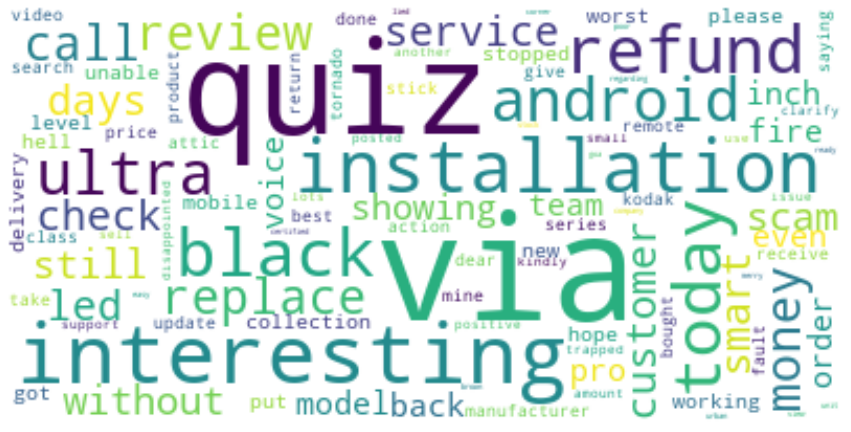

In [97]:
#wordcloud

wordcloud = WordCloud(background_color="white",max_words=100,collocations=False).generate(Tweets)
plt.figure(figsize=[15,27])
plt.imshow(wordcloud, interpolation="bilinear") # collacocations false means we dont want to repeat the words
plt.axis("off")
plt.show()

### Performing overall Snapdeal Sentiment Analysis

In [98]:
#sentiment analysis
# Create quick lambda functions to find the polarity and subjectivity of each routine

from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
Snapdeal['polarity'] = Snapdeal['Tweets'].apply(pol)
Snapdeal.head(5)

,User,Location,Source,Tweets,product,polarity
0,sukeshcraft,new delhi India,Twitter for Android,multiple cheque book holder colour new offer m...,Samsung Tv,0.134091
1,SharmaAmbarPd1,NaN,Twitter for Android,twitter user celebrity apologize folded thing ...,Samsung Tv,0.166667
2,SharmaAmbarPd1,NaN,Twitter for Android,twitter user celebrity apologize folded thing ...,Samsung Tv,0.166667
3,SharmaAmbarPd1,NaN,Twitter for Android,twitter user celebrity apologize folded thing ...,Samsung Tv,0.166667
4,SharmaAmbarPd1,NaN,Twitter for Android,twitter user celebrity apologize folded thing ...,Samsung Tv,0.166667


In [99]:
#classifying the polarity
Snapdeal['Sentiment'] = np.where(Snapdeal['polarity']>=0, 'Positive', 'Negative')
Snapdeal.head()

,User,Location,Source,Tweets,product,polarity,Sentiment
0,sukeshcraft,new delhi India,Twitter for Android,multiple cheque book holder colour new offer m...,Samsung Tv,0.134091,Positive
1,SharmaAmbarPd1,NaN,Twitter for Android,twitter user celebrity apologize folded thing ...,Samsung Tv,0.166667,Positive
2,SharmaAmbarPd1,NaN,Twitter for Android,twitter user celebrity apologize folded thing ...,Samsung Tv,0.166667,Positive
3,SharmaAmbarPd1,NaN,Twitter for Android,twitter user celebrity apologize folded thing ...,Samsung Tv,0.166667,Positive
4,SharmaAmbarPd1,NaN,Twitter for Android,twitter user celebrity apologize folded thing ...,Samsung Tv,0.166667,Positive


In [100]:
#normalizing the value counts of Sentiment column
Snapdeal.Sentiment.value_counts(normalize = True)

Positive    0.848
Negative    0.152
Name: Sentiment, dtype: float64

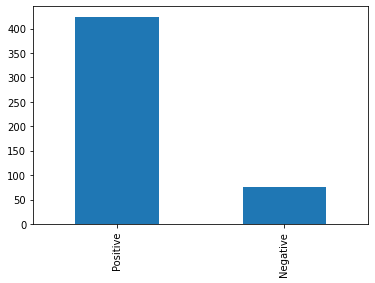

In [101]:
#plotting the bar for sentiments 
Snapdeal.Sentiment.value_counts().plot.bar()

### Analyse product wise

In [102]:
counts = Snapdeal["product"].value_counts()
counts

LG Tv         250
Samsung Tv    250
Name: product, dtype: int64

In [103]:
Result = pd.crosstab(index=Snapdeal['product'], columns=Snapdeal['Sentiment'],margins=True)
Result 

Sentiment,Negative,Positive,All
product,,,
LG Tv,38,212,250
Samsung Tv,38,212,250
All,76,424,500


In [104]:
Result = pd.crosstab(index=Snapdeal['product'], columns=Snapdeal['Sentiment'],margins=True,normalize = True)
Result*100

Sentiment,Negative,Positive,All
product,,,
LG Tv,7.6,42.4,50.0
Samsung Tv,7.6,42.4,50.0
All,15.2,84.8,100.0


## Conclusion

### As we can see Flipkart performed well in terms of positive reviews as compared to other competitors..